In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import testCases
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward
import lr_utils

np.random.seed(1)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#初始化参数(2 layers nn)

def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

#测试
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [3]:
#初始化参数 （deep nn）

def initialize_parameters_deep(layers_dims):
    """
    parameters:
        layers_dims: 包含网络中每个图层的节点数量的列表
    return：
        parameters: 包含"W1","b1","W2","b2"..的字典
                    Wl -  (layers_dims[l],layers_dims[l-1])
                    bl -  (layers_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) / np.sqrt(layers_dims[l - 1])
        parameters["b" + str(l)] = np.random.randn(layers_dims[l], 1)
    
    return parameters

#测试
layers_dims = [5,4,3]
parameters = initialize_parameters_deep(layers_dims)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[-1.18504653]
 [-0.2056499 ]
 [ 1.48614836]
 [ 0.23671627]]
W2 = [[-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]
 [-0.62206166 -0.31320846 -0.40188305 -1.20954159]]
b2 = [[-0.92379202]
 [-1.02387576]
 [ 1.12397796]]


In [4]:
# 前向传播 (2 layers nn)

def linear_forward(A,W,b):
    
    Z = np.dot(W,A) + b

    cache = (A,W,b)
    
    return Z, cache
#测试
A,W,b = testCases.linear_forward_test_case()
Z,linear_cache = linear_forward(A,W,b)
print("Z = " + str(Z))

def linear_activation_forward(A_prev,W,b,activation):
    """
    parameters: 
        A_prev: 来自上一层的激活
        W：     偏重矩阵
        b:      偏向量
        activation: 本层使用的激活函数名
    return：
        A： 激活函数的输出
        cache：一个包含“linear_cache”和“activation_cache”的字典
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache,activation_cache)
    
    return A, cache

#测试
A_prev, W,b = testCases.linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("sigmoid，A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("ReLU，A = " + str(A))


Z = [[ 3.26295337 -1.23429987]]
sigmoid，A = [[0.96890023 0.11013289]]
ReLU，A = [[3.43896131 0.        ]]


In [5]:
# 前向传播 （deep layers nn）
def L_model_forward(X, parameters):
    """
    parameter：
        X - 数据，numpy数组，维度为（输入节点数量，示例数）
        parameters - initialize_parameters_deep（）的输出
    
    返回：
        AL - 最后的激活值
        caches - 包含以下内容的缓存列表：
                 linear_relu_forward（）的每个cache（有L-1个，索引为从0到L-2）
                 linear_sigmoid_forward（）的cache（只有一个，索引为L-1）
    

    """
    
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    
    return AL,caches
#测试
X,parameters = testCases.L_model_forward_test_case()
AL,caches = L_model_forward(X,parameters)
print("AL = " + str(AL))
print("caches 的长度为 = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
caches 的长度为 = 2


In [6]:

# 计算成本

def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1 - AL), 1 - Y)) / m
    
    cost = np.squeeze(cost)
    
    return cost

#测试
Y,AL = testCases.compute_cost_test_case()
print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


In [7]:
# 反向传播(单层线性部分)

def linear_backward(dZ,cache):
    
    A_prev,W,b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ,axis=1,keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev,dW,db
#测试
dZ, linear_cache = testCases.linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [8]:
#反向传播 （单层）
def linear_activation_backward(dA, cache,activation = "relu"):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

#测试
AL, linear_activation_cache = testCases.linear_activation_backward_test_case()
 
dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")
 
dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [9]:
# 反向传播（总）

def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = -(np.divide(Y,AL) - np.divide(1-Y,1-AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp,dW_temp,db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads 

#测试
AL, Y_assess, caches = testCases.L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [10]:

#更新参数

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters
# 测试
parameters, grads = testCases.update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)
 
print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [11]:

# 搭建两层的神经网络
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False,isPlot=True):
    
    np.random.seed(1)
    grads= {}
    costs = []
    (n_x,n_h,n_y) = layers_dims
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    for i in range(1,num_iterations):
        #前向传播
        A1,cache1 = linear_activation_forward(X,W1,b1,"relu")
        A2,cache2 = linear_activation_forward(A1,W2,b2,"sigmoid")
        
        #计算成本
        cost = compute_cost(A2, Y)
        
        #后向传播
        dA2 = -(np.divide(Y,A2) - np.divide(1-Y,1-A2))
        
        dA1,dW2,db2 = linear_activation_backward(dA2,cache2,"sigmoid")
        dA0,dW1,db1 = linear_activation_backward(dA1,cache1,"relu")
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        #更新参数
        parameters = update_parameters(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
        
    #迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回parameters
    return parameters
        
    

第 100 次迭代，成本值为： 0.6465275050316126
第 200 次迭代，成本值为： 0.6327213252763717
第 300 次迭代，成本值为： 0.6018910646433421
第 400 次迭代，成本值为： 0.5606304805447432
第 500 次迭代，成本值为： 0.516283983412948
第 600 次迭代，成本值为： 0.4767314666236869
第 700 次迭代，成本值为： 0.43670615276708286
第 800 次迭代，成本值为： 0.3901708597925323
第 900 次迭代，成本值为： 0.3530123953978948
第 1000 次迭代，成本值为： 0.3355894689520229
第 1100 次迭代，成本值为： 0.3060474672601295
第 1200 次迭代，成本值为： 0.2788707282787334
第 1300 次迭代，成本值为： 0.2550266229795085
第 1400 次迭代，成本值为： 0.20619289257928528
第 1500 次迭代，成本值为： 0.18413592869083273
第 1600 次迭代，成本值为： 0.177366103913725
第 1700 次迭代，成本值为： 0.11399891564554371
第 1800 次迭代，成本值为： 0.09670101395247876
第 1900 次迭代，成本值为： 0.08367289578078574
第 2000 次迭代，成本值为： 0.07458506999166609
第 2100 次迭代，成本值为： 0.0664251734243094
第 2200 次迭代，成本值为： 0.05924247333392902
第 2300 次迭代，成本值为： 0.05340026422233698
第 2400 次迭代，成本值为： 0.04858491571570646


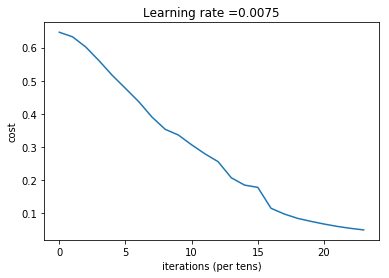

In [12]:
#用数据集检验两层神经网络

#加载数据
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
train_y = train_set_y
test_x = test_x_flatten / 255
test_y = test_set_y

#开始训练
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

parameters = two_layer_model(train_x,train_set_y,layers_dims=(n_x,n_h,n_y),num_iterations=2500,print_cost=True,isPlot=True)


In [13]:
#预测
def predict(X,y,parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X,parameters)
    
    for i in range(0,probas.shape[1]):
        if  probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
            
    print("准确度为: "  + str(float(np.sum((p == y))/m)))
        
    return p

predictions_train = predict(train_x, train_y, parameters) #训练集
predictions_test = predict(test_x, test_y, parameters) #测试集

准确度为: 1.0
准确度为: 0.72


In [14]:
#搭建多层网络
def L_layer_model(X,Y,layers_dims,learning_rate=0.0055,num_iterations = 3000,print_cost = False,isPlot=True):
    
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(num_iterations):
        
        AL,caches = L_model_forward(X,parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if i % 100 == 0:
            costs.append(cost)
            
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()  
    
    return parameters


第 0 次迭代，成本值为： 1.018069332155711
第 100 次迭代，成本值为： 0.6396032875371621
第 200 次迭代，成本值为： 0.6080624633335774
第 300 次迭代，成本值为： 0.5629357037702256
第 400 次迭代，成本值为： 0.5009305512830995
第 500 次迭代，成本值为： 0.43192500258231936
第 600 次迭代，成本值为： 0.36748069300971814
第 700 次迭代，成本值为： 0.33040574752519036
第 800 次迭代，成本值为： 0.29238094088826383
第 900 次迭代，成本值为： 0.2541578796779633
第 1000 次迭代，成本值为： 0.2415427705676241
第 1100 次迭代，成本值为： 0.15898227357951203
第 1200 次迭代，成本值为： 0.11909853622476574
第 1300 次迭代，成本值为： 0.08344948723492772
第 1400 次迭代，成本值为： 0.06496217674086882
第 1500 次迭代，成本值为： 0.05176286993982848
第 1600 次迭代，成本值为： 0.04196170159066288
第 1700 次迭代，成本值为： 0.034485975363082476
第 1800 次迭代，成本值为： 0.02882658772799899
第 1900 次迭代，成本值为： 0.02449737109201823
第 2000 次迭代，成本值为： 0.021096071413762768
第 2100 次迭代，成本值为： 0.018380025186313535
第 2200 次迭代，成本值为： 0.016175703390433074
第 2300 次迭代，成本值为： 0.014359185216454384
第 2400 次迭代，成本值为： 0.012867542104509773


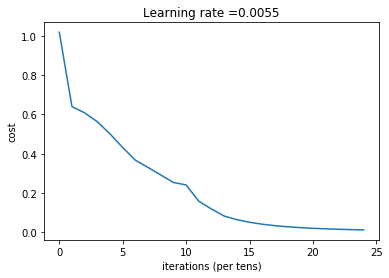

准确度为: 1.0
准确度为: 0.74


In [15]:
layers_dims= [12288, 20, 6, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations =2500, print_cost = True,isPlot=True)
#print(parameters)
pred_train = predict(train_x, train_y, parameters) #训练集
pred_test = predict(test_x, test_y, parameters)